In [14]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from autoML.utils import evaluate_regression

In [15]:
origin = pl.read_csv('/data/ephemeral/home/Dongjin/data/promotion/data_origin/2019-Oct.csv')

In [16]:
origin

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:00:00 UTC""","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-4e00-8c23-a032df…"
"""2019-10-01 00:00:00 UTC""","""view""",3900821,2053013552326770905,"""appliances.environment.water_h…","""aqua""",33.2,554748717,"""9333dfbd-b87a-4708-9857-633655…"
"""2019-10-01 00:00:01 UTC""","""view""",17200506,2053013559792632471,"""furniture.living_room.sofa""",null,543.1,519107250,"""566511c2-e2e3-422b-b695-cf8e6e…"
"""2019-10-01 00:00:01 UTC""","""view""",1307067,2053013558920217191,"""computers.notebook""","""lenovo""",251.74,550050854,"""7c90fc70-0e80-4590-96f3-13c02c…"
"""2019-10-01 00:00:04 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1081.98,535871217,"""c6bd7419-2748-4c56-95b4-8cec9f…"
…,…,…,…,…,…,…,…,…
"""2019-10-31 23:59:58 UTC""","""view""",2300275,2053013560530830019,"""electronics.camera.video""","""gopro""",527.4,537931532,"""22c57267-da98-4f28-9a9c-18bb5b…"
"""2019-10-31 23:59:58 UTC""","""view""",10800172,2053013554994348409,null,"""redmond""",61.75,527322328,"""5054190a-46cb-4211-a8f1-16fc1a…"
"""2019-10-31 23:59:58 UTC""","""view""",5701038,2053013553970938175,"""auto.accessories.player""","""kenwood""",128.7,566280422,"""05b6c62b-992f-4e8e-91f7-961bcb…"


In [17]:
base_path = '/data/ephemeral/home/Dongjin/data/promotion/src'
log_data = pl.read_parquet(base_path + '/data/raw/log_data.parquet')
item_data = pl.read_parquet(base_path + '/data/raw/item_data.parquet')
brand_table = pl.read_parquet(base_path + '/data/raw/brand_table.parquet')
category_table = pl.read_parquet(base_path + '/data/raw/category_table.parquet')
filter_session = pl.read_parquet(base_path + '/data/raw/filter_session.parquet')
user_data = pl.read_parquet(base_path + '/data/raw/user_data.parquet')

log_data = log_data.filter(pl.col('event_type_index') == 3) # 구매한 로그만 필터링

In [18]:
mode_df = log_data.group_by('product_id_index').agg(pl.count().alias('count'))
mode_sorted = mode_df.sort('count', descending=True) # product_id_index 빈도수가 높은 값 순으로 정렬 

/tmp/ipykernel_2905443/2917488335.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  mode_df = log_data.group_by('product_id_index').agg(pl.count().alias('count'))


In [19]:
product_id_index = mode_sorted['product_id_index'][0] # 가장 많이 팔린 product_id_index
df = log_data.filter(pl.col('product_id_index') == product_id_index)
df = df.with_columns(datetime=pl.from_epoch(df['event_time_index']))
df = df.to_pandas()

In [20]:
df_count = df.groupby(pd.Grouper(key='datetime', freq='1H')).agg({'price': ['count', 'mean']})

/tmp/ipykernel_2905443/2875737406.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_count = df.groupby(pd.Grouper(key='datetime', freq='1H')).agg({'price': ['count', 'mean']})


In [21]:
time = df_count.index
sales_volume = df_count['price']['count']
sales_price = df_count['price']['mean']
sales_price = sales_price.interpolate() # 가격 결측치 처리
# sales_volume_diff = sales_volume.diff()
# sales_price_diff = sales_price.diff()

<Axes: xlabel='datetime'>

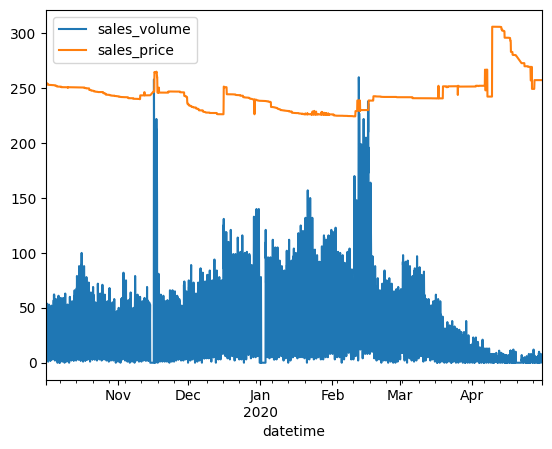

In [22]:
new_df = pd.DataFrame({'sales_volume': sales_volume,
                       'sales_price': sales_price},
                        index=time)

new_df = new_df.dropna()
new_df.plot()

In [23]:
new_df

,sales_volume,sales_price
datetime,,
2019-10-01 02:00:00,7,254.819992
2019-10-01 03:00:00,29,254.759995
2019-10-01 04:00:00,46,254.759995
2019-10-01 05:00:00,40,254.759979
2019-10-01 06:00:00,42,254.759995
...,...,...
2020-04-30 19:00:00,1,257.399994
2020-04-30 20:00:00,5,257.399994
2020-04-30 21:00:00,2,257.399994


In [24]:
n_window = 5

for i in range(1, n_window+1):
    new_df[f'sales_volume_lag{i}'] = new_df['sales_volume'].shift(i)
for i in range(1, n_window):
    new_df[f'sales_price_lag{i}'] = new_df['sales_price'].shift(i)

new_df = new_df[sorted(new_df.columns)]
new_df = new_df.dropna()

In [25]:
target = 'sales_volume'
X = new_df.drop([target], axis=1)
y = new_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('data/X_train.csv')
X_test.to_csv('data/X_test.csv')
y_train.to_csv('data/y_train.csv')
y_test.to_csv('data/y_test.csv')

In [ ]:
pd.set_option('display.precision', 1)
new_df

,sales_price,sales_price_lag1,sales_price_lag2,sales_price_lag3,sales_price_lag4,sales_volume,sales_volume_lag1,sales_volume_lag2,sales_volume_lag3,sales_volume_lag4,sales_volume_lag5
datetime,,,,,,,,,,,
2019-10-01 07:00:00,254.421753,254.759995,254.759979,254.759995,254.759995,34,42.0,40.0,46.0,29.0,7.0
2019-10-01 08:00:00,254.259995,254.421753,254.759995,254.759979,254.759995,54,34.0,42.0,40.0,46.0,29.0
2019-10-01 09:00:00,254.259995,254.259995,254.421753,254.759995,254.759979,47,54.0,34.0,42.0,40.0,46.0
2019-10-01 10:00:00,254.259995,254.259995,254.259995,254.421753,254.759995,44,47.0,54.0,34.0,42.0,40.0
2019-10-01 11:00:00,254.199036,254.259995,254.259995,254.259995,254.421753,31,44.0,47.0,54.0,34.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30 19:00:00,257.399994,257.399994,257.399994,257.399994,257.399994,1,1.0,2.0,5.0,7.0,3.0
2020-04-30 20:00:00,257.399994,257.399994,257.399994,257.399994,257.399994,5,1.0,1.0,2.0,5.0,7.0
2020-04-30 21:00:00,257.399994,257.399994,257.399994,257.399994,257.399994,2,5.0,1.0,1.0,2.0,5.0
